In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import DATA_DIR, FIGURE_DIR, ensure_dir
from childes_mi.utils.general import flatten,save_fig

In [3]:
from childes_mi.information_theory import model_fitting as mf

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [5]:
MI_DF = pd.read_pickle(DATA_DIR/'mi/drosophila_mi_1000_indv_MI.pickle')

In [6]:
MI_DF[:3]

,MI,MI_var,shuff_MI,shuff_MI_var,distances
0,"[5.547644303516421, 5.151395445282732, 4.97493...","[0.02298543805034415, 0.02246780300715515, 0.0...","[4.304687566931552, 4.3167896409202235, 4.3245...","[0.0216208364164089, 0.021638029834572556, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
0,"[5.917134261807169, 5.578157695490129, 5.36517...","[0.02375456253385853, 0.023218822033943185, 0....","[4.2813863557462035, 4.291973073384661, 4.2856...","[0.022219523893322445, 0.022183345866028534, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
0,"[5.676969883808944, 5.2946366948922385, 5.1173...","[0.023592483607056836, 0.023127531399205075, 0...","[4.3170869534776095, 4.315886499994898, 4.3125...","[0.02236044403435806, 0.022362522684390988, 0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


### fit data

In [20]:
MI_DF = MI_DF.assign(**{i:np.nan for i in ['exp_results', 'pow_results', 'concat_results',
     'R2_exp', 'R2_concat', 'R2_power', 'AICc_exp',
     'AICc_concat', 'AICc_power', 'bestfitmodel', 'curvature', 'min_peak']})
MI_DF['curvature'] = MI_DF['curvature'].astype(object)

In [21]:
len(sig), len(row.distances)

(1000, 1000)

In [54]:
MI_DF = MI_DF.reset_index()

In [55]:
n = 100 # max distance for computation
for idx, row in tqdm(MI_DF.iterrows(), total=len(MI_DF)):
    # get signal
    sig = np.array(row.MI-row.shuff_MI)
    distances = row.distances
    # fit models
    results_power, results_exp, results_pow_exp, best_fit_model = mf.fit_models(distances, sig)

    # get fit results
    R2_exp, R2_concat, R2_power, AICc_exp, \
        AICc_pow, AICc_concat = mf.fit_results(sig, distances, 
                                              results_exp, results_power,
                                              results_pow_exp)
    min_peak = np.nan
    
    # get save model fit results to MI_DF
    MI_DF.loc[idx, np.array(['exp_results', 'pow_results', 'concat_results',
                         'R2_exp', 'R2_concat', 'R2_power', 'AICc_exp',
                         'AICc_concat', 'AICc_power', 'bestfitmodel',  'min_peak'])] = [
        results_exp, results_power, results_pow_exp,
        R2_exp, R2_concat, R2_power, AICc_exp,
        AICc_concat, AICc_pow, best_fit_model,
        min_peak
    ]

-5182.690088180769
-5182.665967577754 -5182.690088180769
-7453.444219657049
-7453.420123271507 -7453.444219657049
-6213.716095965237
-6213.691999579695 -6213.716095965237
-6554.56524553312
-6554.541149147578 -6554.56524553312
-5162.735294060071
-5162.711197674529 -5162.735294060071
-6400.318172588311
-6400.294076202769 -6400.318172588311
-6019.21851274819
-6019.194416362648 -6019.21851274819
-7229.103814247387
-7229.079717861845 -7229.103814247387
-5582.26902753943
-5582.244931153888 -5582.26902753943
-8809.272129018505
-8809.248032632964 -8809.272129018505
-2068.023677190482
-2067.9843973214147 -2068.023677190482
-7539.952321613261
-7539.928225227719 -7539.952321613261
-6807.055056868545
-6807.030960483003 -6807.055056868545
-5259.208103949135
-5259.18381245116 -5259.208103949135
-4355.213538229227
-4355.188948065293 -4355.213538229227
-7440.601308684843
-7440.577212299301 -7440.601308684843
-5976.453253107867
-5976.4291567223245 -5976.453253107867
-6704.384505563973
-6704.36040917843

In [56]:
MI_DF[:3]

,index,MI,MI_var,shuff_MI,shuff_MI_var,distances,exp_results,pow_results,concat_results,R2_exp,R2_concat,R2_power,AICc_exp,AICc_concat,AICc_power,bestfitmodel,curvature,min_peak
0,0,"[5.547644303516421, 5.151395445282732, 4.97493...","[0.02298543805034415, 0.02246780300715515, 0.0...","[4.304687566931552, 4.3167896409202235, 4.3245...","[0.0216208364164089, 0.021638029834572556, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",<lmfit.minimizer.MinimizerResult object at 0x7...,<lmfit.minimizer.MinimizerResult object at 0x7...,<lmfit.minimizer.MinimizerResult object at 0x7...,0.921704,0.942423,0.907987,-5343.947495,-5646.975063,-5182.665968,pow_exp,NaN,NaN
1,0,"[5.917134261807169, 5.578157695490129, 5.36517...","[0.02375456253385853, 0.023218822033943185, 0....","[4.2813863557462035, 4.291973073384661, 4.2856...","[0.022219523893322445, 0.022183345866028534, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",<lmfit.minimizer.MinimizerResult object at 0x7...,<lmfit.minimizer.MinimizerResult object at 0x7...,<lmfit.minimizer.MinimizerResult object at 0x7...,0.952369,0.983956,0.976800,-6734.075937,-7818.205195,-7453.420123,pow_exp,NaN,NaN
2,0,"[5.676969883808944, 5.2946366948922385, 5.1173...","[0.023592483607056836, 0.023127531399205075, 0...","[4.3170869534776095, 4.315886499994898, 4.3125...","[0.02236044403435806, 0.022362522684390988, 0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",<lmfit.minimizer.MinimizerResult object at 0x7...,<lmfit.minimizer.MinimizerResult object at 0x7...,<lmfit.minimizer.MinimizerResult object at 0x7...,0.941057,0.977447,0.956820,-5902.507484,-6859.187568,-6213.692000,pow_exp,NaN,NaN


### plot fits

In [57]:
from matplotlib import gridspec

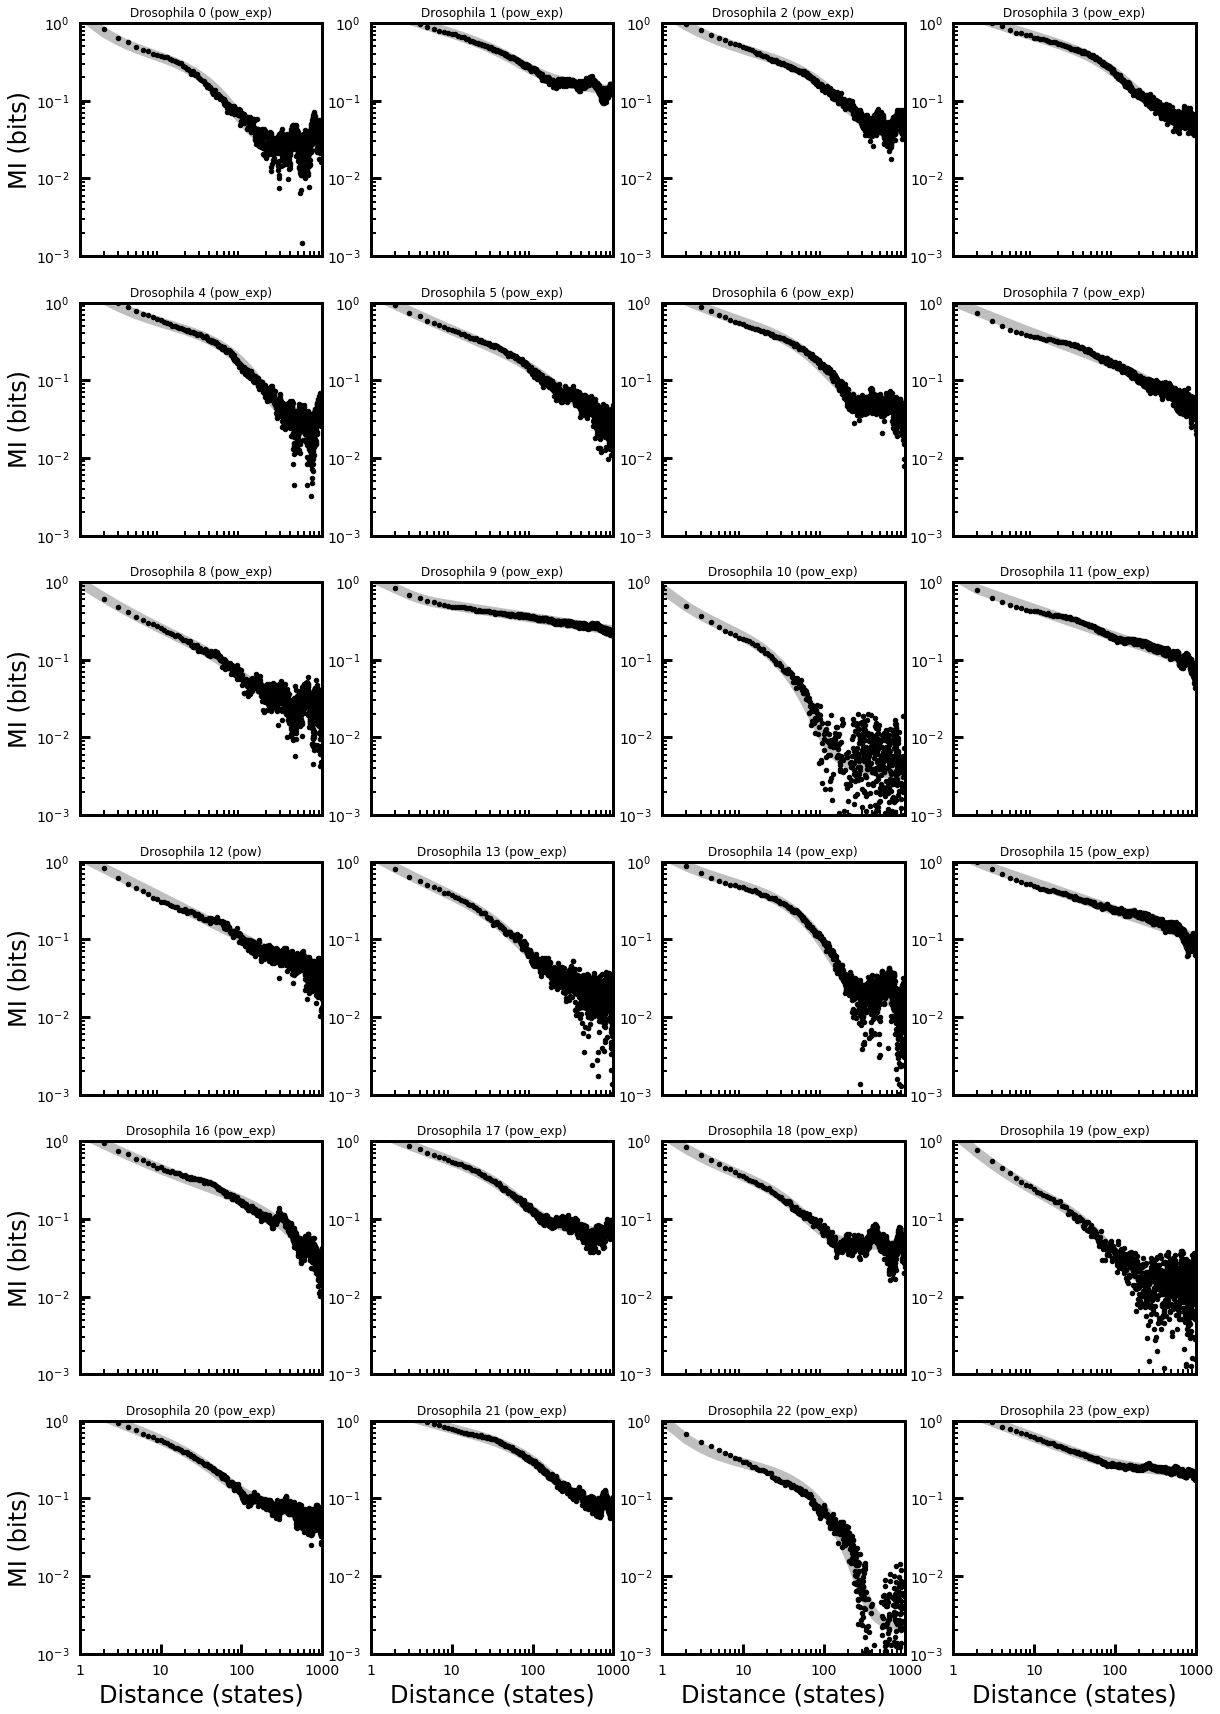

In [64]:
ncols = 4
nrows = 6
yoff=-.20

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 30))
for axi, (idx, row) in enumerate(MI_DF[:nrows*ncols].iterrows()):
    ax = axs.flatten()[axi]

    color = "k"
    sig = np.array(row.MI - row.shuff_MI)
    distances = row.distances

    sig_lims = np.log([np.min(sig[sig>0]), np.nanmax(sig)])
    sig_lims = [sig_lims[0] - (sig_lims[1]-sig_lims[0])/10,
                    sig_lims[1] + (sig_lims[1]-sig_lims[0])/10]


    if axi in [ncols*i for i in range(nrows)]:
        ax.set_ylabel("MI (bits)", labelpad=5, fontsize=24)
        ax.yaxis.set_label_coords(yoff, 0.5)

    distances_model = np.logspace(0, np.log10(distances[-1]), base=10, num=1000)

    # plot real data
    ax.scatter(distances, sig, alpha=1, s=20, color=color)
    #print(idx)
    if row.bestfitmodel == "pow_exp":
        y_model = mf.get_y(mf.pow_exp_decay, row.concat_results, distances)

    elif row.bestfitmodel == "exp":
        y_model = mf.get_y(mf.exp_decay, row.exp_results, distances)

    elif row.bestfitmodel == "pow":
        y_model = mf.get_y(mf.powerlaw_decay, row.pow_results, distances)

    #print(y_model[:3])
    # plot modelled data
    ax.plot(distances, y_model, alpha=0.25, lw=10, color=color)

    ax.set_title("Drosophila {} ({})".format(axi, row.bestfitmodel))
    ax.set_xlim([distances[0], distances[-1]])
    sig_lims[0] = np.log(10e-6)  #
    ax.set_ylim([1e-3, 1])
    ax.tick_params(which="both", direction="in", labelsize=14, pad=10)
    ax.tick_params(which="major", length=10, width=3)
    ax.tick_params(which="minor", length=5, width=2)
    ax.set_xscale("log", basex=10)
    ax.set_yscale("log", basey=10)
    ax.set_xticks([])
    for axis in ["top", "bottom", "left", "right"]:
        ax.spines[axis].set_linewidth(3)
        ax.spines[axis].set_color("k")

    if axi in range(nrows*ncols - ncols, nrows*ncols):
        ax.set_xticks([1,10,100, 1000])
        ax.set_xticklabels(['1','10','100', '1000'])
        ax.set_xlabel("Distance (states)", labelpad=5, fontsize=24)

ensure_dir(FIGURE_DIR/ 'mi' / 'indv')
save_fig(FIGURE_DIR/ 'mi' / 'indv' /('drosophila_mi_individual'))
plt.show()